In [32]:
!pip install -r requirements.txt | grep -v 'already satisfied'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following code is used to run the phase demodulation algorithm, as well as create plots. Explanation of plots below.

In [33]:
import alg.StellarRadio_alg
stellar_init = alg.StellarRadio_alg.StellarRadioAlg()
time,flux,quarter,simmf = stellar_init.run_all_steps()

cadence type: long
Frequency guess: 14.187637075855344
Iteration 0
mix: 1000.0 14.187637075855344 -1.0 0.0 -0.013443589210510254 0.00013246499315282026 (0.8524053399343429-0.12720753878105676j)
0.746838007037312 0.7294612730008921 0.017376734036419886
Amps: 1000.0 1157.1423654552461
mix: 1157.1423654552461 14.187637075855344 -1.0 0.0 -0.013443589210510254 0.00013246499315282026 (0.9863543313783086-0.14719723232885193j)
Phases: -1.0 -1.1481403523964162
mix: 1157.1423654552461 14.187637075855344 -1.1481403523964162 0.0 -0.013443589210510254 0.00013246499315282026 (0.9972772394043735-1.9225866799549196e-12j)
Frequencies: 14.187637075855344 14.187634369778326
Iteration 1
mix: 1157.1423654552461 14.187634369778326 -1.1481403523964162 0.0 -0.013443589210510254 0.00013246499315282026 (0.997064832695915-0.014522461620822243j)
1.0000000445939938 0.9979654342551763 0.002034610338817691
Amps: 1157.1423654552461 1157.1423396544471
mix: 1157.1423396544471 14.187634369778326 -1.1481403523964162 0.0 

pickle file exists for object


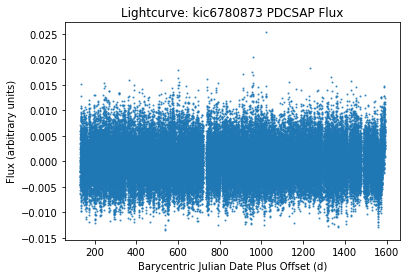

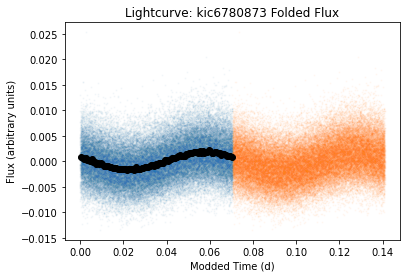

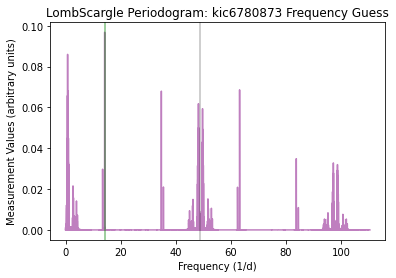

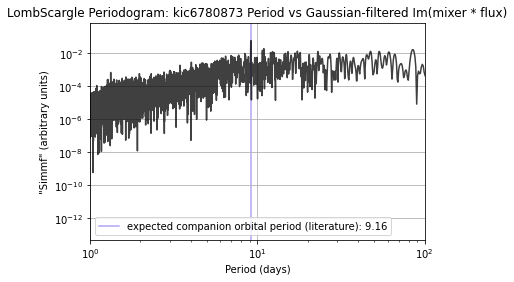

In [34]:
import alg.StellarRadio_plotting
plot_init = alg.StellarRadio_plotting.StellarRadioAlg_Plotting()
plot_init.do_plots()

Plot 1: Light curve of KIC 6780873 (flux v time) <br> <br>
Plot 2: Folded light curve of KIC 6780873  <br> <br>
Plot 3: LombScargle periodogram of flux, time. We want the tallest peak within 0 to 24 cycles/day (Nyquist frequency). The green line's location corresponds to the tallest peak.  <br> <br>
Plot 4: LombScargle periodogram of gaussian-filtered, imaginary component of mixer (carrier signal) * flux, time. KIC 6780873
    has a companion with a period of ~ 9.16 days. In this plot, we see a clear peak at 9.16 days, confirming the code's success.

The following code is used for testing (testing via injection):

In [ ]:
import numpy as np

# choose parameters for injected frequency
amp_fake = .0015 #flux units
freq_fake = 70 + np.e/2 #inverse days
phase_fake = 2 #0 to 2pi #radians
planet_period_fake = 17.56 #days
planet_amp_fake = 1e-3 #days -> this is about one second
planet_phase_fake = 1 #radians

print(amp_fake,freq_fake,phase_fake)

In [ ]:
distorted_time = time + planet_amp_fake * np.cos(2 * np.pi *time / planet_period_fake + planet_phase_fake) 
flux_fake = flux + amp_fake * np.cos(2*np.pi *freq_fake * distorted_time + phase_fake)

In [ ]:
time,flux_fake,quarter,simmf = stellar_init.run_all_steps(injection_flux=flux_fake,qmin=65,qmax=80)

In [ ]:
plot_init.do_plots() #we expect a peak at 17.56 days!